In [77]:
# Import the pandas library, which is used for data manipulation and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Load the Excel file 'board2.xlsx' into a DataFrame called 'board'
board = pd.read_excel('board2.xlsx')
board


,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


In [81]:
# Filter the 'board' DataFrame to select rows where:
# - The 'Track' column is equal to 'Instrumentation'
# - The 'Hometown' column is equal to 'Luzon'
# - The 'Electronics' column value is greater than 70
# Select only the 'Name', 'GEAS', and 'Electronics' columns from the filtered DataFrame
Instru = board.loc[(board['Track'] == 'Instrumentation') &
                   (board['Hometown'] == 'Luzon') & 
                   (board['Electronics']>70), ['Name','GEAS', 'Electronics']]
Instru

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


In [83]:
ave = (board.loc[:, 'Math'] + board.loc[:, 'Electronics'] + board.loc[:, 'GEAS'] + board.loc[:, 'Communication'])/4

df1 = pd.DataFrame(board)
df2 = pd.DataFrame(ave, columns = ['Average'])

boardECE = pd.concat([df1,df2], axis=1, join='inner')

In [85]:
Mindy = boardECE.loc[(boardECE['Gender'] == 'Female') &
                  (boardECE['Hometown'] == 'Mindanao') & 
                  (boardECE['Average'] >= 55), ['Name','Track','Electronics','Average']]
Mindy

,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


In [98]:
def GWA():
    board['Average'] = board[['Math', 'Electronics', 'GEAS', 'Communication']].mean(axis=1)
    return board['Average']
GWA()

0     75.00
1     67.25
2     72.75
3     70.50
4     69.00
5     75.50
6     58.50
7     61.75
8     47.75
9     67.25
10    54.75
11    76.00
12    62.25
13    80.50
14    59.00
15    77.25
16    70.50
17    63.50
18    73.00
19    66.50
20    68.50
21    62.50
22    68.75
23    57.75
24    75.25
25    65.75
26    60.75
27    67.75
28    63.50
29    68.00
Name: Average, dtype: float64

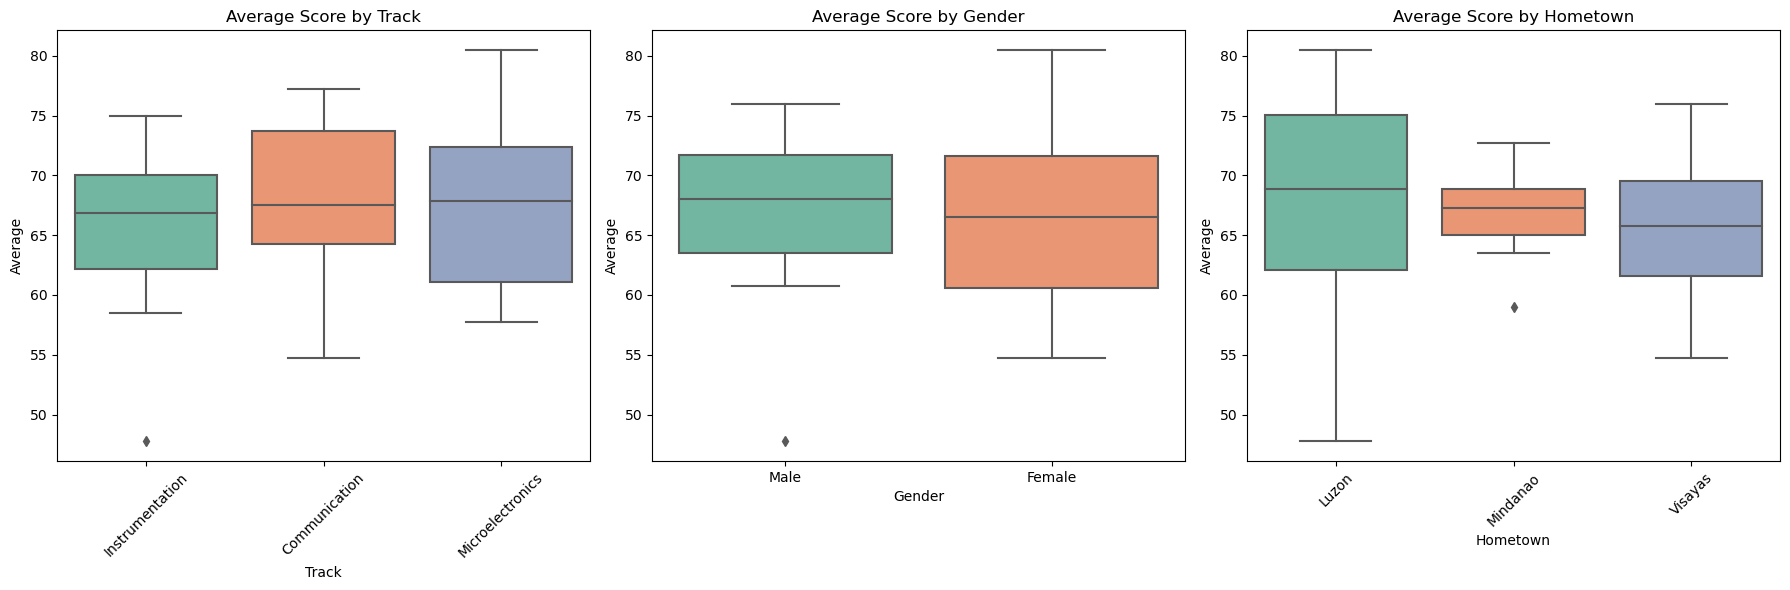

In [100]:
# Set the color palette for the boxplots
sns.set_palette("Set2")

# Create a figure with 1 row and 3 columns for the subplots
plt.figure(figsize=(18, 6))

# Boxplot for Track
plt.subplot(1, 3, 1)
sns.boxplot(x='Track', y=GWA(), data=board)
plt.title('Average Score by Track')
plt.xticks(rotation=45)

# Boxplot for Gender
plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y=GWA(), data=board)
plt.title('Average Score by Gender')

# Boxplot for Hometown
plt.subplot(1, 3, 3)
sns.boxplot(x='Hometown', y=GWA(), data=board)
plt.title('Average Score by Hometown')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()